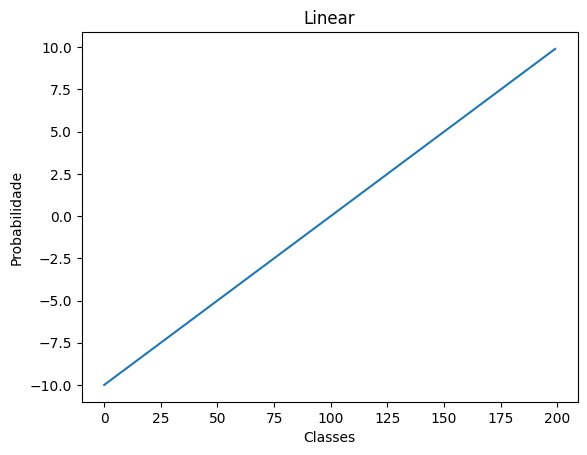

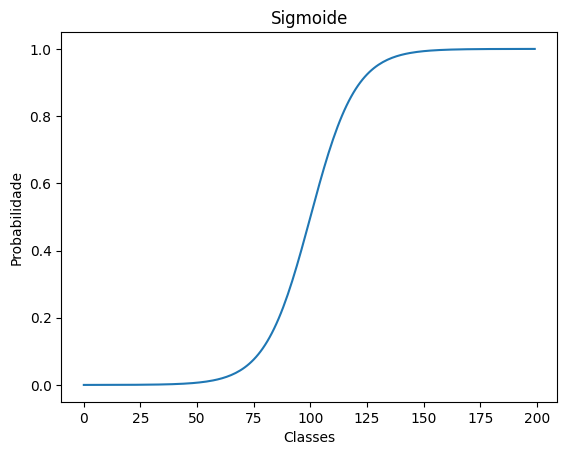

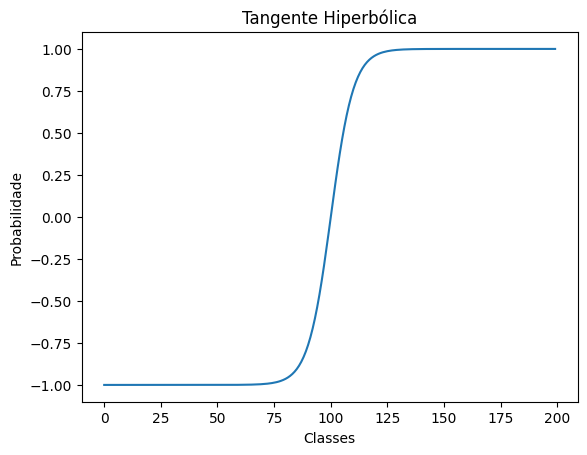

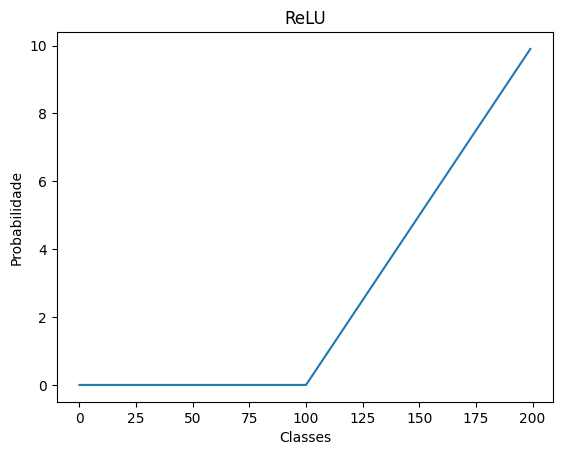

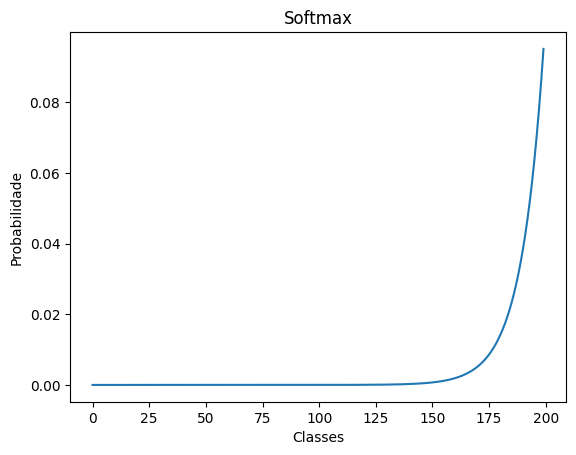

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados Sintéticos
z = np.arange(-10, 10, 0.1)

# Função Linear
plt.plot(z)
plt.title('Linear')
plt.xlabel('Classes')
plt.ylabel('Probabilidade')
plt.show()

# Função Sigmoide
plt.plot(1 / (1 + np.exp(-z)))
plt.title('Sigmoide')
plt.xlabel('Classes')
plt.ylabel('Probabilidade')
plt.show()

# Função Tangente Hiperbólica (tanh)
plt.plot(np.tanh(z))
plt.title('Tangente Hiperbólica')
plt.xlabel('Classes')
plt.ylabel('Probabilidade')
plt.show()

# Função Rectifier Linear Unit (ReLU)
plt.plot(np.maximum(0, z))
plt.title('ReLU')
plt.xlabel('Classes')
plt.ylabel('Probabilidade')
plt.show()

# Função Softmax
beta = 1.0
plt.plot(np.exp(beta * z) / np.sum(np.exp(beta * z)))
plt.title('Softmax')
plt.xlabel('Classes')
plt.ylabel('Probabilidade')
plt.show()

In [2]:
# Exemplo prático
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Carregar dados
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
import pandas as pd
df = pd.DataFrame(X, columns=iris.feature_names)
df['targets'] = iris.target

In [11]:
map_targets = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}
df['targets'] = df['targets'].map(map_targets)

In [13]:
df['targets'].value_counts()

,count
targets,
setosa,50
versicolor,50
virginica,50


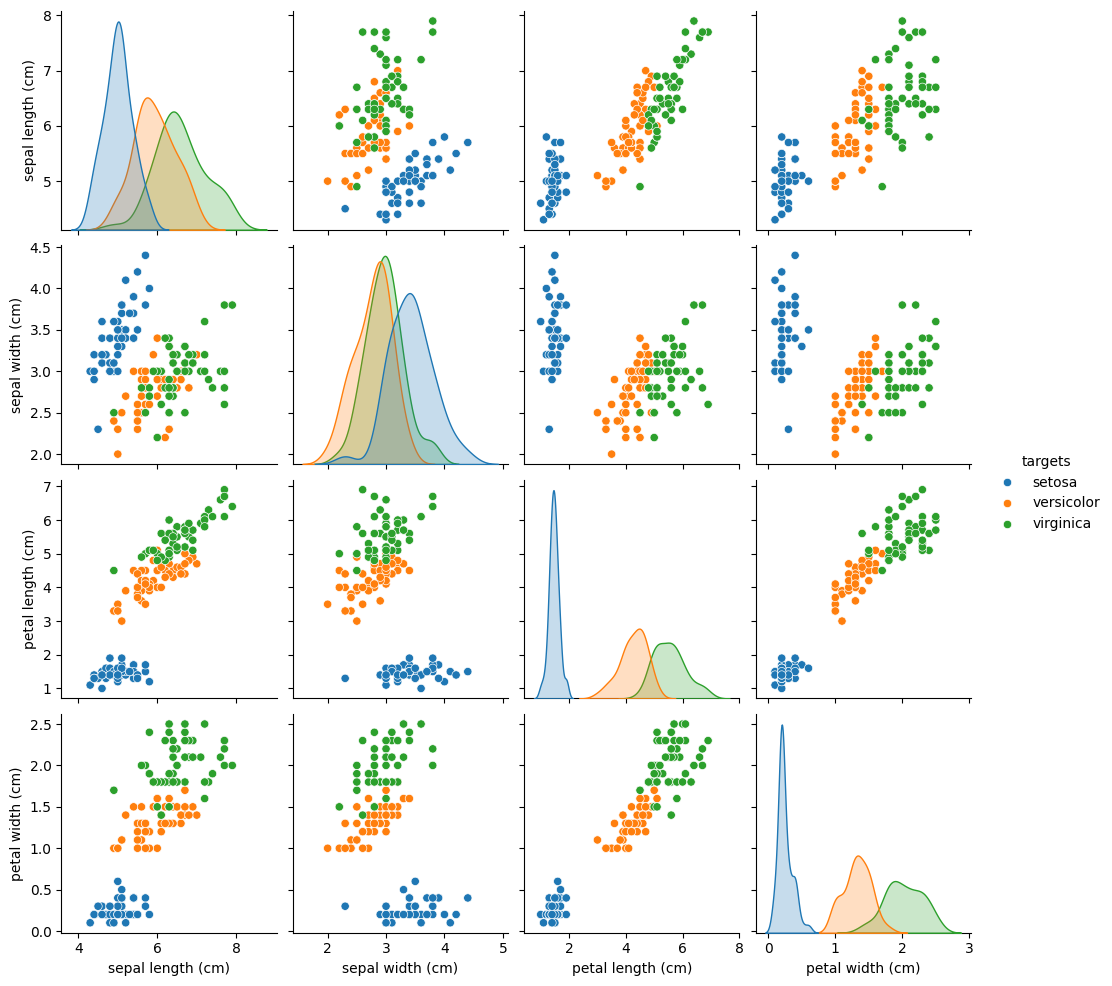

In [14]:
import seaborn as sns
sns.pairplot(df, hue='targets')

In [15]:
# Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [32]:
# Criar modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Avaliação
y_pred = mlp.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



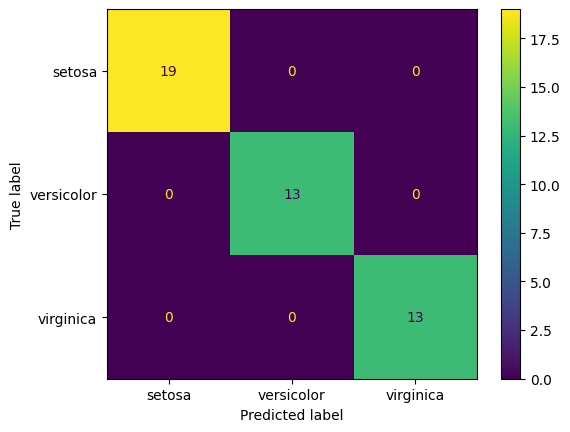

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming y_test and y_pred are already defined from the previous code
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

In [23]:
# Salvar o modelo treinado
import joblib
with open('/content/modelo/model.joblib', 'wb') as f:
  joblib.dump(mlp, f)

In [28]:
# Ler o modelo treinado
with open('/content/modelo/model.joblib', 'rb') as f:
  model = joblib.load(f)

# Validação do modelo - Exemplo 1

y_pred = model.predict([X_test[0]])
if y_pred[0] == 0:
  print('Setosa')
elif y_pred[0] == 1:
  print('Versicolor')
else:
  print('Virginica')

Versicolor


In [29]:
# Exemplo 2
y_pred = model.predict([X_test[2]])
if y_pred[0] == 0:
  print('Setosa')
elif y_pred[0] == 1:
  print('Versicolor')
else:
  print('Virginica')

Virginica


In [34]:
# Atividade em Sala - Gabarito
dataset = pd.read_csv('/content/Criar um dataset com variáveis como_ febre, tosse... - Criar um dataset com variáveis como_ febre, tosse....csv')
dataset.head()

,Febre,Tosse,Dor de Cabeça,Doente (1) / Saudável (0)
0,1,1,1,1
1,1,0,1,1
2,0,1,0,0
3,1,1,0,1
4,0,0,1,0


In [35]:
dataset['Doente (1) / Saudável (0)'].value_counts()

,count
Doente (1) / Saudável (0),
1,5
0,5


In [36]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Doente (1) / Saudável (0)', axis=1), dataset['Doente (1) / Saudável (0)'], test_size=0.2, random_state=42)

In [37]:
clf = MLPClassifier(hidden_layer_sizes=(4,), max_iter=100, random_state=42)
clf.fit(X_train, y_train)

# Avaliação
y_pred = clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

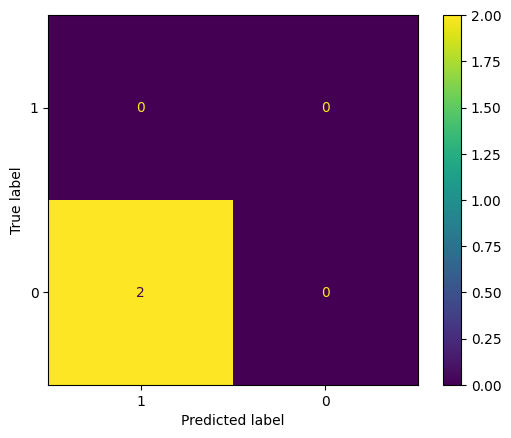

In [43]:
# Assuming y_test and y_pred are already defined from the previous code
cm = confusion_matrix(y_test, y_pred)
unique_labels = dataset['Doente (1) / Saudável (0)'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()
plt.show()

In [ ]:
# MLP Regressor - Desafio para Casa